In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from tqdm import tqdm, tqdm_notebook
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv(r"D:\Intership\sentiment_analysis\reviews_badminton\data.csv")

In [3]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
df.duplicated().sum()

4

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(8514, 8)

In [8]:
df.isna().sum()

Reviewer Name        6
Review Title         6
Place of Review     46
Up Votes             6
Down Votes           6
Month              461
Review text          4
Ratings              0
dtype: int64

In [9]:
df[df.isna()]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [11]:
df.columns = df.columns.str.lower()

In [12]:
df

,reviewer name,review title,place of review,up votes,down votes,month,review text,ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
...,...,...,...,...,...,...,...,...
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [13]:
df['reviewer name'].describe()

count                  8508
unique                 6243
top       Flipkart Customer
freq                   2098
Name: reviewer name, dtype: object

In [14]:
df['reviewer name'].isna().sum()

6

In [15]:
df['reviewer name'].value_counts()

reviewer name
Flipkart Customer       2098
My Account                11
Praveen Kumar              6
Rajesh Kumar               5
Santhosh Kumar             5
                        ... 
MANOHAR PAIGHAN            1
Abhijith KV                1
SURIDDHA MUNSHI            1
Kudge Kupendrareddy        1
vishnu varma               1
Name: count, Length: 6243, dtype: int64

In [16]:
df['reviewer name'].fillna('other',inplace=True)

In [17]:
df['reviewer name'].isna().sum()

0

In [18]:
df['review title'].describe()

count          8508
unique          194
top       Wonderful
freq            416
Name: review title, dtype: object

In [19]:
df['review title'].isna().sum()

6

In [20]:
df['review title'].fillna('other',inplace=True)

In [21]:
df['review title'].value_counts()

review title
Wonderful                                       416
Brilliant                                       303
Classy product                                  299
Excellent                                       298
Perfect product!                                295
                                               ... 
Happy.                                            1
Great shuttle but wised if it’s more durable      1
Better game play experience                       1
awesome shuttle                                   1
playing with this since very long                 1
Name: count, Length: 195, dtype: int64

In [22]:
df['review title'] = df['review title'].str.lower()

In [23]:
df['review title']

0                    nice product
1          don't waste your money
2       did not meet expectations
3                            fair
4                     over priced
                  ...            
8509                        other
8510                        other
8512                        other
8513                        other
8515                        other
Name: review title, Length: 8514, dtype: object

In [24]:
df['place of review'].describe()

count                           8468
unique                          2337
top       Certified Buyer, Bengaluru
freq                             319
Name: place of review, dtype: object

In [25]:
df['place of review'].value_counts()

place of review
Certified Buyer, Bengaluru          319
Certified Buyer, Hyderabad          251
Certified Buyer, Chennai            240
Certified Buyer, Bangalore          212
Certified Buyer, New Delhi          155
                                   ... 
Certified Buyer, Dhubri District      1
Certified Buyer, Kathanian            1
Certified Buyer, Rajnagar             1
Certified Buyer, Gundlupet            1
Certified Buyer, Raebareli            1
Name: count, Length: 2337, dtype: int64

In [26]:
#count = df['place of review'].apply(lambda x : sum += sum if re.findall(r'Certified Buyer',x) else pass)

In [27]:
#total_count = df['place of review'].apply(lambda x : x.count('Certified Buyer')).sum()

In [28]:
total_count = df['place of review'].apply(lambda x : x.count('Certified Buyer') if isinstance(x, str) else 0).sum()


In [29]:
len(df['place of review']) - total_count

46

In [30]:
df['certified buyer'] = df['place of review'].apply(lambda x : 1 if isinstance(x,str) and 'Certified Buyer' in x else 0 )

In [31]:
df['certified buyer'].value_counts()

certified buyer
1    8468
0      46
Name: count, dtype: int64

In [32]:
df['place of review'] = df['place of review'].apply(lambda x : re.sub(r'Certified Buyer,','',x) if isinstance(x,str) else x)

In [33]:
df['place of review'] = df['place of review'].str.strip()

In [34]:
df['place of review'].value_counts()

place of review
Bengaluru          319
Hyderabad          251
Chennai            240
Bangalore          212
New Delhi          155
                  ... 
Dhubri District      1
Kathanian            1
Rajnagar             1
Gundlupet            1
Raebareli            1
Name: count, Length: 2337, dtype: int64

In [35]:
df['place of review'] = df['place of review'].str.lower()

In [36]:
df['place of review'].isna().sum()

46

In [37]:
df['place of review'].fillna('other',inplace=True)

In [38]:
df['place of review'].isna().sum()

0

In [39]:
df

,reviewer name,review title,place of review,up votes,down votes,month,review text,ratings,certified buyer
0,Kamal Suresh,nice product,chirakkal,889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,1
1,Flipkart Customer,don't waste your money,hyderabad,109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,1
2,A. S. Raja Srinivasan,did not meet expectations,dharmapuri,42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,1
3,Suresh Narayanasamy,fair,chennai,25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3,1
4,ASHIK P A,over priced,other,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0
...,...,...,...,...,...,...,...,...,...
8509,other,other,other,NaN,NaN,NaN,Not sure why we have charged for this product ...,1,0
8510,other,other,other,NaN,NaN,NaN,NaN,1,0
8512,other,other,other,NaN,NaN,NaN,NaN,2,0
8513,other,other,other,NaN,NaN,NaN,NaN,5,0


In [40]:
df['up votes'].describe()

count    8508.000000
mean        0.391396
std        11.613909
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       889.000000
Name: up votes, dtype: float64

In [41]:
df['up votes'].isna().sum()

6

In [42]:
df['up votes'].value_counts(normalize = True)

up votes
0.0      0.973554
1.0      0.014692
2.0      0.003879
3.0      0.001998
4.0      0.001175
5.0      0.000470
14.0     0.000353
8.0      0.000235
22.0     0.000235
6.0      0.000235
17.0     0.000118
124.0    0.000118
24.0     0.000118
11.0     0.000118
216.0    0.000118
9.0      0.000118
7.0      0.000118
19.0     0.000118
13.0     0.000118
889.0    0.000118
12.0     0.000118
30.0     0.000118
109.0    0.000118
81.0     0.000118
71.0     0.000118
23.0     0.000118
142.0    0.000118
146.0    0.000118
57.0     0.000118
50.0     0.000118
59.0     0.000118
403.0    0.000118
173.0    0.000118
147.0    0.000118
25.0     0.000118
42.0     0.000118
15.0     0.000118
Name: proportion, dtype: float64

In [43]:
df['up votes'].fillna(0.0,inplace=True)

In [44]:
df['up votes'].isna().sum()

0

In [45]:
df['down votes'].describe()

count    8508.000000
mean        0.121768
std         3.248022
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       219.000000
Name: down votes, dtype: float64

In [46]:
df['down votes'].isna().sum()

6

In [47]:
df['down votes'].value_counts(normalize = True)

down votes
0.0      0.984015
1.0      0.009756
2.0      0.001763
3.0      0.001293
5.0      0.000470
7.0      0.000235
4.0      0.000235
6.0      0.000235
35.0     0.000118
20.0     0.000118
106.0    0.000118
219.0    0.000118
8.0      0.000118
10.0     0.000118
64.0     0.000118
29.0     0.000118
53.0     0.000118
52.0     0.000118
16.0     0.000118
12.0     0.000118
13.0     0.000118
121.0    0.000118
45.0     0.000118
24.0     0.000118
9.0      0.000118
Name: proportion, dtype: float64

In [48]:
df['down votes'].fillna(0.0,inplace=True)

In [49]:
df['down votes'].isna().sum()

0

In [50]:
df['month'].isna().sum()

461

In [51]:
df['month'].fillna('other',inplace=True)

In [52]:
df['month'].describe()

count      8514
unique       81
top       other
freq        461
Name: month, dtype: object

In [53]:
df['month'].value_counts()

month
other       461
Oct 2020    237
Dec 2018    223
Jul 2020    220
Aug 2020    208
           ... 
Apr 2020      3
Apr 2016      2
Dec 2015      2
Mar 2016      1
Jul 2016      1
Name: count, Length: 81, dtype: int64

In [54]:
df['year'] = df['month'].apply(lambda x : ''.join(re.findall(r'[0-9]',x)) if x != 'other' else np.NaN)

In [55]:
df['year'].value_counts()

year
2020    1918
2021    1774
2018    1606
2019    1356
2017     782
2022     561
2016      54
2015       2
Name: count, dtype: int64

In [56]:
df['year'].isna().sum()

461

In [57]:
df['month'] = df['month'].apply(lambda x : ''.join(re.sub(r'[^A-z ]','',x)).lower() if x != 'other' else x)

In [58]:
df['month'].value_counts()

month
oct      847
dec      774
jan      747
nov      683
mar      674
may      659
feb      638
aug      631
sep      631
jun      621
jul      621
apr      527
other    461
Name: count, dtype: int64

In [59]:
df

,reviewer name,review title,place of review,up votes,down votes,month,review text,ratings,certified buyer,year
0,Kamal Suresh,nice product,chirakkal,889.0,64.0,feb,"Nice product, good quality, but price is now r...",4,1,2021
1,Flipkart Customer,don't waste your money,hyderabad,109.0,6.0,feb,They didn't supplied Yonex Mavis 350. Outside ...,1,1,2021
2,A. S. Raja Srinivasan,did not meet expectations,dharmapuri,42.0,3.0,apr,Worst product. Damaged shuttlecocks packed in ...,1,1,2021
3,Suresh Narayanasamy,fair,chennai,25.0,1.0,other,"Quite O. K. , but nowadays the quality of the...",3,1,NaN
4,ASHIK P A,over priced,other,147.0,24.0,apr,Over pricedJust â?¹620 ..from retailer.I didn'...,1,0,2016
...,...,...,...,...,...,...,...,...,...,...
8509,other,other,other,0.0,0.0,other,Not sure why we have charged for this product ...,1,0,NaN
8510,other,other,other,0.0,0.0,other,NaN,1,0,NaN
8512,other,other,other,0.0,0.0,other,NaN,2,0,NaN
8513,other,other,other,0.0,0.0,other,NaN,5,0,NaN


In [60]:
df['review text'].describe()

count              8510
unique             4983
top       GoodREAD MORE
freq                695
Name: review text, dtype: object

In [61]:
df['review text'] = df['review text'].str.lower()

In [62]:
df['review text']

0       nice product, good quality, but price is now r...
1       they didn't supplied yonex mavis 350. outside ...
2       worst product. damaged shuttlecocks packed in ...
3       quite o. k. , but nowadays  the quality of the...
4       over pricedjust â?¹620 ..from retailer.i didn'...
                              ...                        
8509    not sure why we have charged for this product ...
8510                                                  NaN
8512                                                  NaN
8513                                                  NaN
8515                                                  NaN
Name: review text, Length: 8514, dtype: object

In [63]:
df['review text'].isna().sum()

4

In [64]:
df['review text'].fillna('no comments',inplace=True)

In [65]:
df['ratings'].value_counts()

ratings
5    5080
4    1745
1     767
3     615
2     307
Name: count, dtype: int64

In [66]:
df['ratings'].describe()

count    8514.000000
mean        4.182053
std         1.261331
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: ratings, dtype: float64

In [67]:
df['ratings'].isna().sum()

0

In [68]:
df['review text'].isna().sum()

0

In [69]:
df['review text'].fillna('no comment',inplace=True)

In [70]:
df.drop(columns=['reviewer name','place of review','month','certified buyer','year','review title','up votes','down votes'],axis=1,inplace=True)

In [71]:
df

,review text,ratings
0,"nice product, good quality, but price is now r...",4
1,they didn't supplied yonex mavis 350. outside ...,1
2,worst product. damaged shuttlecocks packed in ...,1
3,"quite o. k. , but nowadays the quality of the...",3
4,over pricedjust â?¹620 ..from retailer.i didn'...,1
...,...,...
8509,not sure why we have charged for this product ...,1
8510,no comments,1
8512,no comments,2
8513,no comments,5


In [72]:
import nltk

In [73]:
#example = df['review text'][0]
#example

In [74]:
#nltk.word_tokenize(example)

In [75]:
#df['review text'][1]

In [76]:
#from nltk.sentiment import SentimentIntensityAnalyzer


In [77]:
#nltk.download('vader_lexicon')


In [78]:
#sia.polarity_scores(df['review text'][0])

In [79]:
#sia.polarity_scores(df['review text'][1]).items()

In [80]:
#df['review text'].fillna('no comments',inplace=True)

In [81]:
#res={}
#for index, value in enumerate(df['review text']):
#    res[index]=sia.polarity_scores(value)
    
#vaders_title = pd.DataFrame(res).T
#vaders_title.rename(columns={'neg':'title_neg','neu':'title_neu','pos':'title_pos','compound':'title_compound'},inplace=True)

In [82]:
#vaders_title

In [83]:
def preprocess(text):
    try:
        token = re.sub(r'[^a-z]',' ',text)
        tokens = token.split()
        clean_token = [j for j in tokens if j not in stopwords.words('english')]
        stemmer = PorterStemmer()
        clean_token = [stemmer.stem(j) for j in clean_token]
    except:
        pass
    return pd.Series([" ".join(clean_token), len(clean_token)])

In [84]:
import nltk
from tqdm import tqdm, tqdm_notebook
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

In [85]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [86]:
df_tem = df['review text'].progress_apply(lambda x: preprocess(x))

100%|█████████████████████████████████████████████████████████████████████████████| 8514/8514 [00:15<00:00, 535.71it/s]


In [87]:
df_tem

,0,1
0,nice product good qualiti price rise bad sign ...,20
1,suppli yonex mavi outsid cover yonex ad insid ...,12
2,worst product damag shuttlecock pack new box o...,17
3,quit k nowaday qualiti cork like year back use...,30
4,pricedjust retail understand wat advantag buy ...,9
...,...,...
8509,sure charg product mrp okay pay rs product com...,27
8510,comment,1
8512,comment,1
8513,comment,1


In [88]:
df_tem.columns = ['review_text_cleaned','no_of_tokens']

In [89]:
df_tem

,review_text_cleaned,no_of_tokens
0,nice product good qualiti price rise bad sign ...,20
1,suppli yonex mavi outsid cover yonex ad insid ...,12
2,worst product damag shuttlecock pack new box o...,17
3,quit k nowaday qualiti cork like year back use...,30
4,pricedjust retail understand wat advantag buy ...,9
...,...,...
8509,sure charg product mrp okay pay rs product com...,27
8510,comment,1
8512,comment,1
8513,comment,1


In [90]:
sia = SentimentIntensityAnalyzer()

In [91]:
res={}
for index, value in enumerate(df_tem['review_text_cleaned']):
    res[index]=sia.polarity_scores(value)['compound']
    
#vaders_title = pd.DataFrame(res,index=index)
#vaders_title.rename(columns={'compound':'title_compound'},inplace=True)

vaders_title = pd.DataFrame(list(res.items()), columns=['Index', 'Value'])
vaders_title.drop(columns='Index',inplace=True)
vaders_title.rename(columns={'Value':'compound'}, inplace=True)

In [92]:
vaders_title

,compound
0,0.8316
1,-0.4767
2,-0.8360
3,0.9042
4,0.0000
...,...
8509,0.8481
8510,0.0000
8511,0.0000
8512,0.0000


In [93]:
df_clean = pd.concat([df_tem,vaders_title],axis=1)

In [94]:
df_clean

,review_text_cleaned,no_of_tokens,compound
0,nice product good qualiti price rise bad sign ...,20.0,0.8316
1,suppli yonex mavi outsid cover yonex ad insid ...,12.0,-0.4767
2,worst product damag shuttlecock pack new box o...,17.0,-0.8360
3,quit k nowaday qualiti cork like year back use...,30.0,0.9042
4,pricedjust retail understand wat advantag buy ...,9.0,0.0000
...,...,...,...
8510,comment,1.0,0.0000
8512,comment,1.0,0.0000
8513,comment,1.0,0.0000
8515,comment,1.0,NaN


In [95]:
df_clean.drop(columns='no_of_tokens',inplace=True)

In [96]:
df_clean['review text']=df_clean['review_text_cleaned'].fillna(' ')

In [97]:
def sentiment(n):
    if n <= 0.4 and n != 0.4:
        return 'Negative'
    elif n > 0.4:
        return 'Positive'
    elif n==0.4:
        return 'Neutral'

In [98]:
df_clean['Emotion'] = df_clean['compound'].apply(sentiment)

<Axes: xlabel='Emotion'>

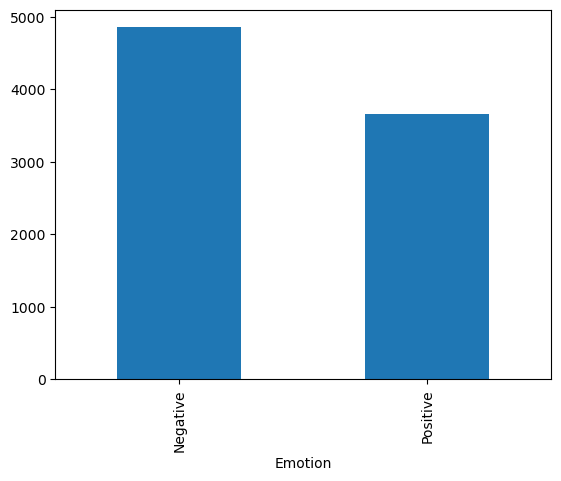

In [99]:
df_clean['Emotion'].value_counts().plot(kind='bar')

In [100]:
df_clean

,review_text_cleaned,compound,review text,Emotion
0,nice product good qualiti price rise bad sign ...,0.8316,nice product good qualiti price rise bad sign ...,Positive
1,suppli yonex mavi outsid cover yonex ad insid ...,-0.4767,suppli yonex mavi outsid cover yonex ad insid ...,Negative
2,worst product damag shuttlecock pack new box o...,-0.8360,worst product damag shuttlecock pack new box o...,Negative
3,quit k nowaday qualiti cork like year back use...,0.9042,quit k nowaday qualiti cork like year back use...,Positive
4,pricedjust retail understand wat advantag buy ...,0.0000,pricedjust retail understand wat advantag buy ...,Negative
...,...,...,...,...
8510,comment,0.0000,comment,Negative
8512,comment,0.0000,comment,Negative
8513,comment,0.0000,comment,Negative
8515,comment,NaN,comment,None


In [101]:
yonex = pd.concat([df_clean['review_text_cleaned'],df_clean['Emotion']],axis=1)

In [102]:
yonex.dropna(inplace=True)

In [103]:
yonex

,review_text_cleaned,Emotion
0,nice product good qualiti price rise bad sign ...,Positive
1,suppli yonex mavi outsid cover yonex ad insid ...,Negative
2,worst product damag shuttlecock pack new box o...,Negative
3,quit k nowaday qualiti cork like year back use...,Positive
4,pricedjust retail understand wat advantag buy ...,Negative
...,...,...
8508,complaint item best one way price easili avail...,Positive
8509,sure charg product mrp okay pay rs product com...,Positive
8510,comment,Negative
8512,comment,Negative


In [104]:
X=yonex['review_text_cleaned']
y=yonex['Emotion']

In [105]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [106]:
pipe=Pipeline([('Vectorization',CountVectorizer()),
              ("Estimator",MultinomialNB(alpha=3))])

In [107]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Vectorization', CountVectorizer()),
                ('Estimator', MultinomialNB(alpha=3))])

In [108]:
y_pred = pipe.predict(X_test)

In [109]:
accuracy_score(y_test,y_pred)

0.9230769230769231

In [110]:
f1_score(y_test, y_pred, average='weighted')

0.9234012786170078

### Creating a pickle file

In [111]:
#import pickle
#pickle.dump(pipe,open("sentiment_yonex.pkl","wb"))

In [140]:
import os
os.getcwd()

'C:\\Users\\tejas\\mlfow'

In [113]:
#os.chdir('D:\Intership\sentiment_analysis_web')

In [114]:
import pickle
pickle.dump(pipe,open("sentiment_yonex.pkl","wb"))

In [115]:
os.getcwd()

'D:\\Intership\\sentiment_analysis_web'

In [116]:
predict = pickle.load(open("sentiment_yonex.pkl","rb"))

In [117]:
predict.predict(['This is so good'])[0]

'Positive'

In [118]:
predict.predict(['to be frank its not worth the price'])[0]

'Positive'

In [130]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
import joblib
from joblib import Memory


In [120]:
import os
os.getcwd()

'D:\\Intership\\sentiment_analysis_web'

## ML work flow

In [141]:
import warnings

warnings.filterwarnings('ignore')

In [142]:
#pip install xgboost

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

In [149]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)


best_models={}

pipelines = {
    'RandomForest': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', RandomForestClassifier())
    ],memory=memory),
    'DecisionTrees': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ],memory=memory),
    'LogisticRegression': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', LogisticRegression())
    ],memory=memory),
    'KNeighbors': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', KNeighborsClassifier())
    ],memory=memory),
    'NaiveBayes': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', MultinomialNB())
    ],memory=memory),
    'SVC': Pipeline([
        ('Vectorization', TfidfVectorizer()),
        ('classifier', SVC())
    ],memory=memory)
    
}

param_grids = {
    'RandomForest': {
        'Vectorization': [TfidfVectorizer(),CountVectorizer()],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'DecisionTrees': {
        'Vectorization': [TfidfVectorizer(),CountVectorizer()],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5, 10]
    },
    'LogisticRegression': {
        'Vectorization': [TfidfVectorizer(),CountVectorizer()],
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2']
    },
    'KNeighbors': {
        'Vectorization': [TfidfVectorizer(),CountVectorizer()],
        'classifier__n_neighbors': [3, 5, 7, 9],
        'classifier__p': [1, 2, 3]
    },
    'NaiveBayes': {
        'Vectorization': [TfidfVectorizer(),CountVectorizer()],
    },
    'SVC': {
        'Vectorization': [TfidfVectorizer(),CountVectorizer()],
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    }
     
}


In [150]:
#for name, model in best_models.items():
#    print(f"{name}")
#    print(f"{model}")
#    print()

In [151]:
#pip install mlflow


In [152]:
import mlflow
mlflow.set_experiment("sentiment_analysis")

<Experiment: artifact_location='file:///C:/Users/tejas/mlfow/mlruns/594246249576835514', creation_time=1711878766133, experiment_id='594246249576835514', last_update_time=1711878766133, lifecycle_stage='active', name='sentiment_analysis', tags={}>

In [153]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** RandomForest **********


2024/03/31 16:56:25 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: total: 7min 37s
Wall time: 17min 45s
Train Score:  0.9819383259911895
Test Score:  0.9817968291250734

********** DecisionTrees **********


2024/03/31 17:14:12 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: total: 31.2 s
Wall time: 1min 19s
Train Score:  0.9839941262848753
Test Score:  0.9853200234879624

********** LogisticRegression **********


2024/03/31 17:15:34 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 6.92 s
Wall time: 22 s
Train Score:  0.98575624082232
Test Score:  0.9864944216089254

********** KNeighbors **********


2024/03/31 17:15:56 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: total: 3min 44s
Wall time: 3min 29s
Train Score:  0.9189427312775331
Test Score:  0.920728126834997

********** NaiveBayes **********


2024/03/31 17:19:26 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 2.3 s
Wall time: 8.48 s
Train Score:  0.9208516886930983
Test Score:  0.9236641221374046

********** SVC **********


2024/03/31 17:19:35 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
CPU times: total: 1min 2s
Wall time: 1min 43s
Train Score:  0.9891336270190896
Test Score:  0.98825601879037



In [154]:
# Stop the auto logger

mlflow.sklearn.autolog(disable=True)